# CDC Diabetes Health Indicators
### Realizado por: Bogdan Rivera


Instalación del repositorio.

In [1]:
pip install -q ucimlrepo

Recolección de los datos.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

Visualización de las variables características y variables objetivo.

In [3]:
print("Variables características")
print(X[:5])
print("Variables objetivo")
print(y[:5])

Variables características
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age 

Conversión a un tipo de dato de pandas y visualización de los primeros cinco registros.



In [4]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


Verificación de datos nulos o incompletos:

In [5]:
print(df.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


Para este caso no existen valores nulos o incompletos.

Verificación de los tipos de datos.

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

HighBP: int64
HighChol: int64
CholCheck: int64
BMI: int64
Smoker: int64
Stroke: int64
HeartDiseaseorAttack: int64
PhysActivity: int64
Fruits: int64
Veggies: int64
HvyAlcoholConsump: int64
AnyHealthcare: int64
NoDocbcCost: int64
GenHlth: int64
MentHlth: int64
PhysHlth: int64
DiffWalk: int64
Sex: int64
Age: int64
Education: int64
Income: int64
Diabetes_binary: int64


Todos los valores son de tipo entero. Observando los tipos únicos de cada característica:

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print("Numero total de características: ",len(df.columns))

HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]
Diabetes_binary: [0 1]
Numero total de características:  22


De acuerdo a lo anterior, existen variables binarias y algunas otras categóricas no binarias.

Las características binarias son: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']



In [8]:
caracteristicas_binarias = []
for col in df.columns:
    if len(df[col].unique()) == 2:
        caracteristicas_binarias.append(col)
print("Caracteristicas binarias: ",caracteristicas_binarias)

caracteristicas_no_binarias = []
for col in df.columns:
    if len(df[col].unique()) > 2:
        caracteristicas_no_binarias.append(col)
print("Caracteristicas no binarias: ",caracteristicas_no_binarias)

Caracteristicas binarias:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']
Caracteristicas no binarias:  ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


Se puede realizar una descripción rápida de los datos:

In [9]:
#Para características no binarias:
df[caracteristicas_no_binarias].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [10]:
#Para características binarias:
df[caracteristicas_binarias].describe()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,0.168224,0.440342,0.139333
std,0.494934,0.494210,0.189571,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,0.374066,0.496429,0.346294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
print("Numero de características binarias: ",len(caracteristicas_binarias))
print("Numero de características no binarias: ",len(caracteristicas_no_binarias))

Numero de características binarias:  15
Numero de características no binarias:  7


Una vez que se revisaron los datos se procede a realizar los diagramas para verificar que no existan outliers. Esto se puede realizar en una sola gráfica.

<ipython-input-12-1f4b4f74de02>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


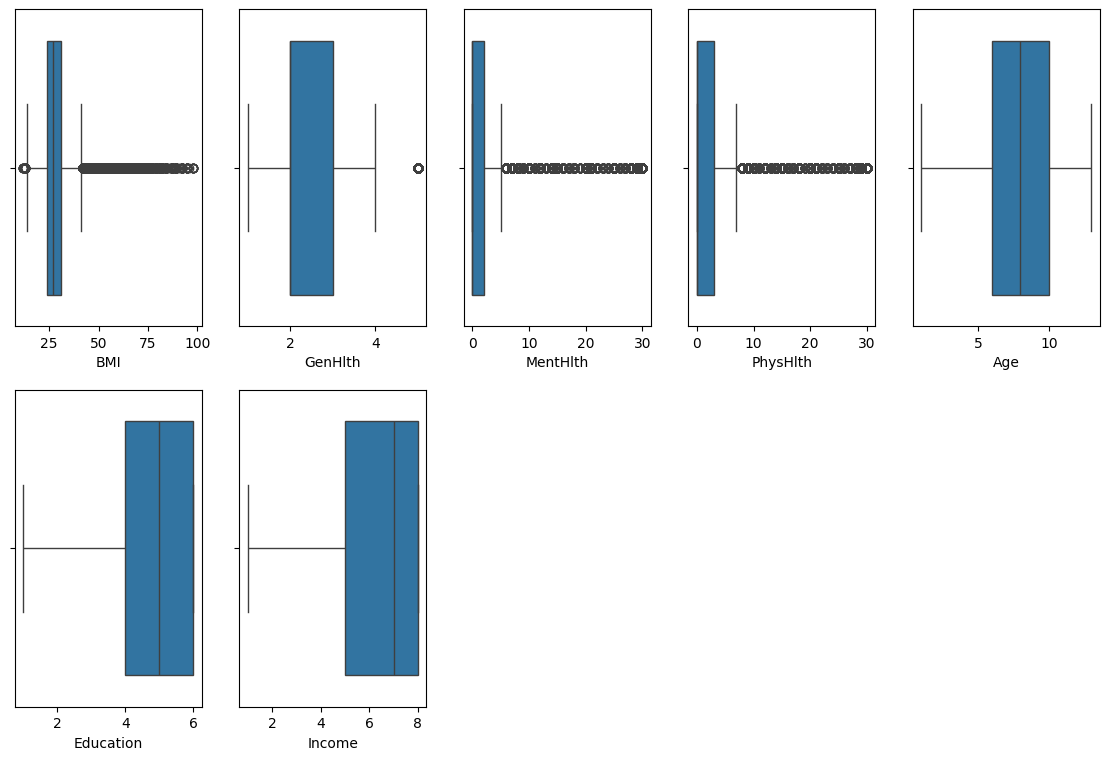

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#Para características no binarias
plt.figure(figsize=(14, 14))
plt.title("Boxplot para características no binarias")

for i in range(len(caracteristicas_no_binarias)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[caracteristicas_no_binarias[i]])

<ipython-input-13-73c9ada009b2>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


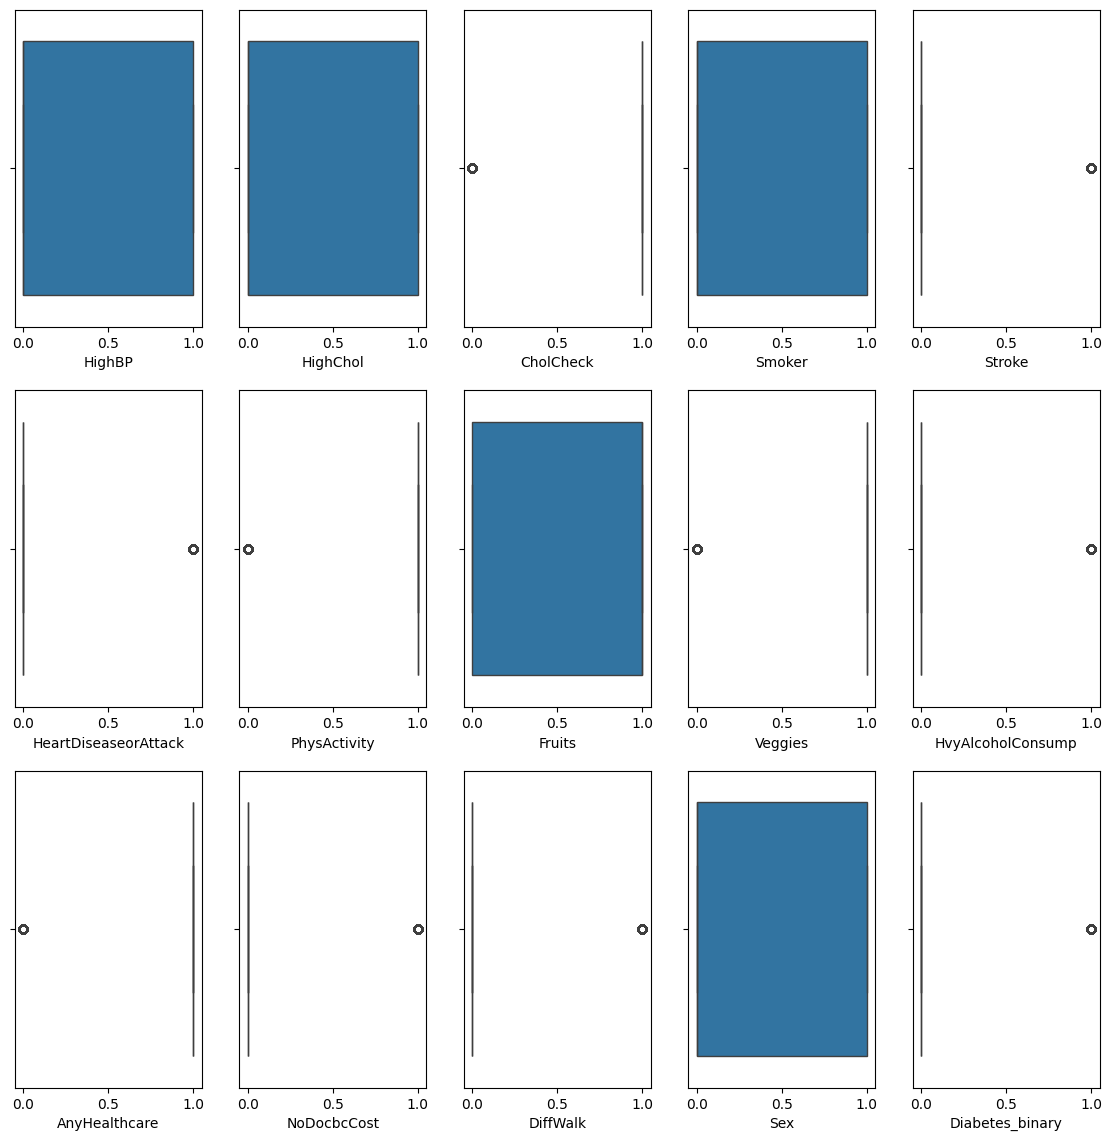

In [13]:
#Para características binarias
plt.figure(figsize=(14, 14))
plt.title("Boxplot para características binarias")
for i in range(len(caracteristicas_binarias)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[caracteristicas_binarias[i]])

De igual forma se puede realizar los histogramas de cada una de las variables:

<Figure size 2000x1400 with 0 Axes>

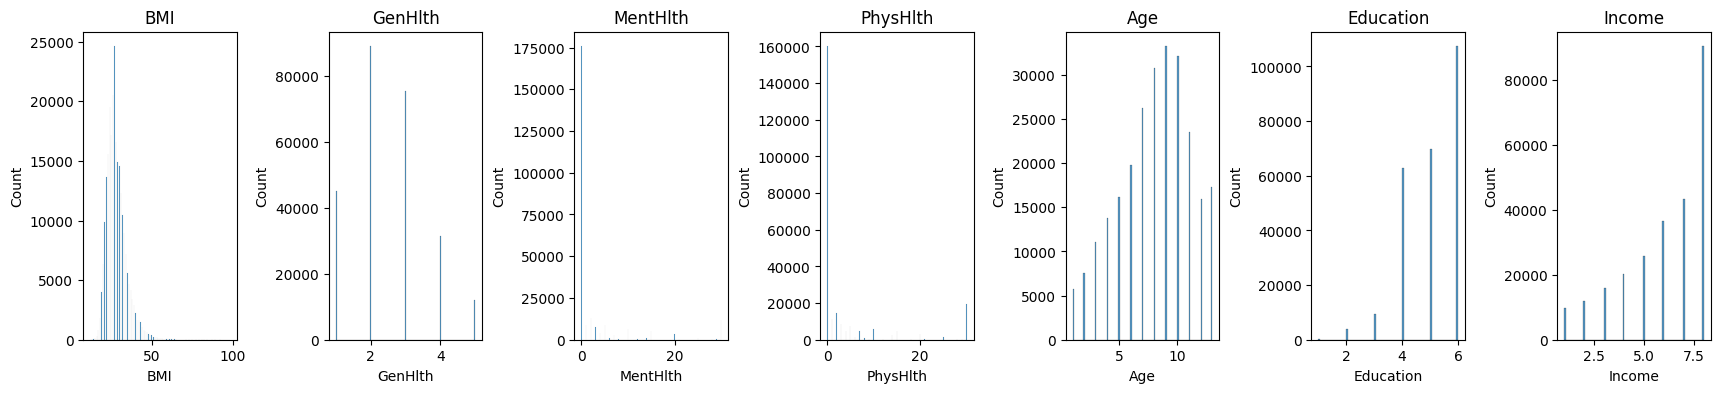

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


#Para variables no binarias
plt.figure(figsize=(20, 14))
plt.suptitle("Histogramas para características no binarias", fontsize=16)


fig, axes = plt.subplots(1, 7, figsize=(21, 4), sharex=False, sharey=False,gridspec_kw={'wspace': 0.6})

for i, ax in enumerate(axes):
    sns.histplot(x=df[caracteristicas_no_binarias[i]], ax=ax)
    ax.set_title(caracteristicas_no_binarias[i])

<Figure size 2000x1400 with 0 Axes>

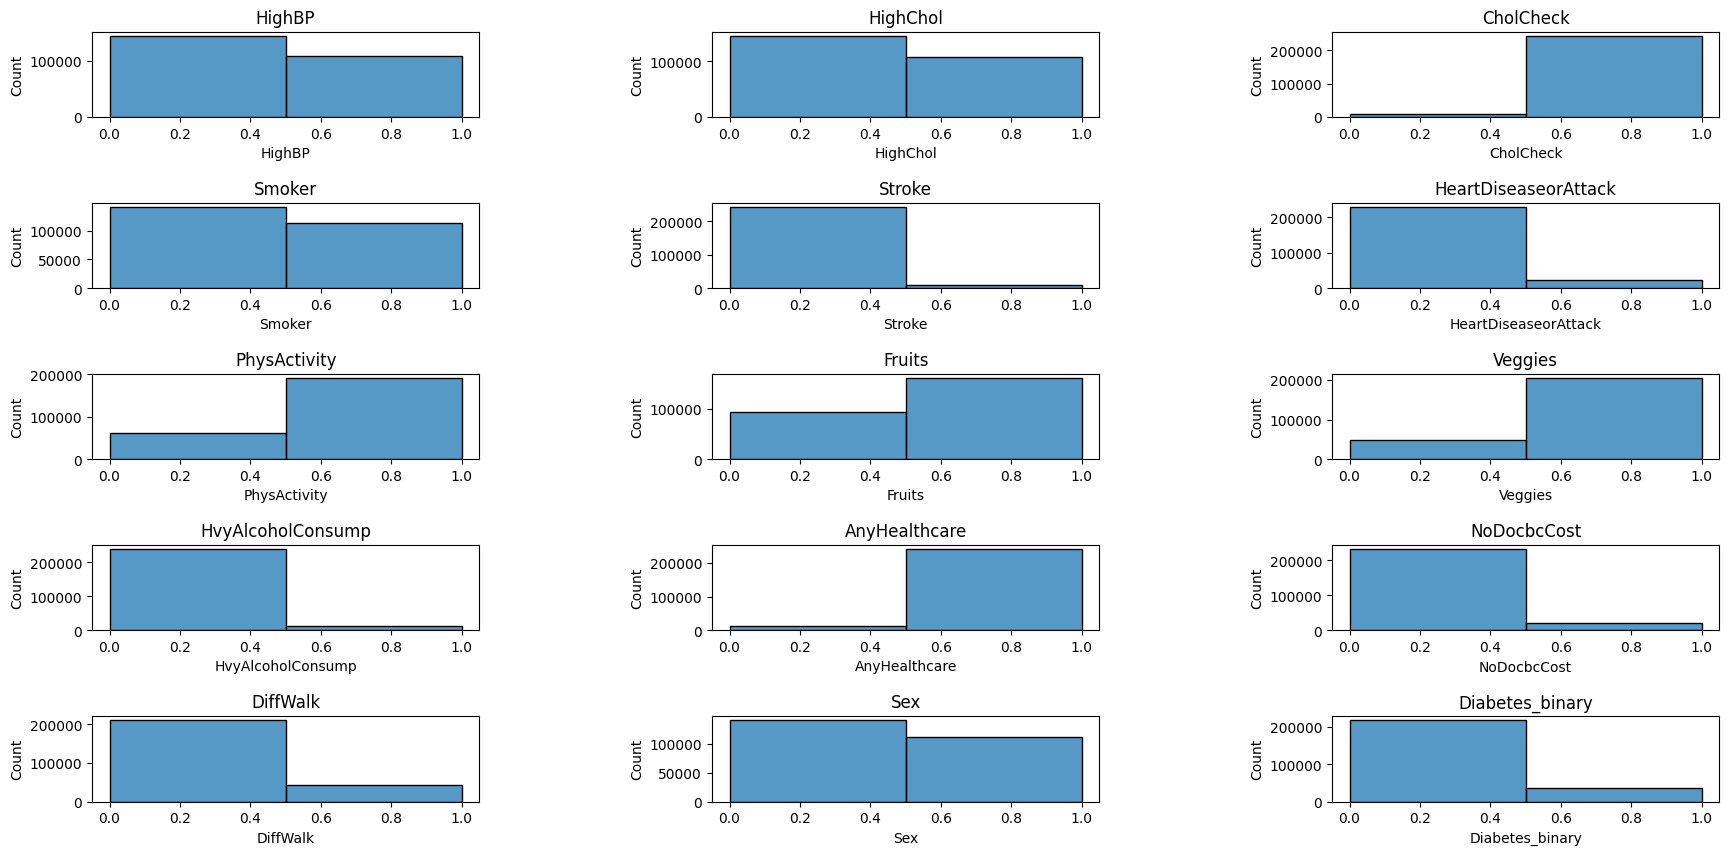

In [15]:
#Para variables binarias
plt.figure(figsize=(20, 14))
plt.suptitle("Histogramas para características no binarias", fontsize=16)


fig, axes = plt.subplots(5, 3, figsize=(21, 10), sharex=False, sharey=False,gridspec_kw={'wspace': 0.6,'hspace': 1})

for i, ax in enumerate(axes.flat):
    sns.histplot(x=df[caracteristicas_binarias[i]], ax=ax,bins=2)
    ax.set_title(caracteristicas_binarias[i])


En las gráficas de boxplot e histogramas se pueden visualizar distintas características:

* Boxplot.
  - Variables no binarias: La mayoría de los datos son categóricos, sin embargo existen algunas variables que pueden ser consideradas como numéricas y pueden ser normalizadas para que se ajusten mejor al modelo. Para este caso se tienen las características: [BMI,MentHlth,PhysHlth]. Por otra parte en la característica [GenHlth] se tienen pocos outliers, por lo que sería considerable quitarlo. En el caso de las variables pueden ser indexadas.
  - Variables binarias: Se tienen datos relativamente consistentes con muy pocos outliers, por lo que se puede considerar quitarlos.
* Histograma.
   - Variables no binarias: Existe una diferencia considerable en algunos elementos en la cantidad de datos, específciamente en [Menthlt, Pyhschlt].
   - Variables binarias: En el caso de las variables binarias existe una diferencia de datos considerable. Estan variables son: [CholCheck, Stroke,HeartDiseaserorAttack, Veggies, HvyAlcoholConsump, AnyHealthCare, NoDocbcCost, DiffWalk, Diabetes_binary].

Como se mencionó anteriormente, verificamos los outliers, por lo que se pueden eliminar en dado caso.

## Variables no binarias:

In [16]:
#Para las variables no binarias [BMI,MentHlth,PhysHlth]
import pandas as pd

def contar_outliers(df, cols):
    outlier_count = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers
        outlier_count[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    total_registros = df.shape[0]
    total_outliers = sum(outlier_count.values())
    registros_sin_outliers = total_registros - total_outliers

    return {
        "total_registros": total_registros,
        "total_outliers": total_outliers,
        "registros_sin_outliers": registros_sin_outliers,
        "outliers_por_variable": outlier_count
    }

caracteristicas_no_binarias_1 = ['BMI', 'MentHlth', 'PhysHlth']
resultado = contar_outliers(df, caracteristicas_no_binarias_1)

for i,j in resultado.items():
    print(i,j)


total_registros 253680
total_outliers 87004
registros_sin_outliers 166676
outliers_por_variable {'BMI': 9847, 'MentHlth': 36208, 'PhysHlth': 40949}


Para observar la cuenta de los valores únicos de esas variables a analizar.

In [17]:
for i in caracteristicas_no_binarias_1:
    print(f'Cuenta de valores para {i}: ')
    print(df[i].value_counts())

Cuenta de valores para BMI: 
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
Cuenta de valores para MentHlth: 
MentHlth
0     175680
2      13054
30     12088
5       9030
1       8538
3       7381
10      6373
15      5505
4       3789
20      3364
7       3100
25      1188
14      1167
6        988
8        639
12       398
28       327
21       227
29       158
18        97
9         91
16        88
27        79
22        63
17        54
26        45
11        41
13        41
23        38
24        33
19        16
Name: count, dtype: int64
Cuenta de valores para PhysHlth: 
PhysHlth
0     160052
30     19400
2      14764
1      11388
3       8495
5       7622
10      5595
15      4916
4       4542
7       4538
20      3273
14      2587
25      1336
6       1330
8        809
21       663
12       578
28       522
29       215
9        179
18       152
16       

Para la estandarización es considerable realizar ciertas indexaciones.

In [18]:
import pandas as pd
import pandas as pd

# Crear una copia del DataFrame original
df_indexado = df.copy()

# Indexar cada variable en los rangos deseados y obtener los límites de los intervalos
# 5 categorías para BMI
df_indexado['BMI_index'], bins_bmi = pd.cut(df_indexado['BMI'], bins=5, labels=[1, 2, 3, 4,5], retbins=True)

# 4 categorías para MentalHealth
df_indexado['MentHlth_index'], bins_menthlth = pd.cut(df_indexado['MentHlth'], bins=4, labels=[1, 2, 3, 4],retbins=True)

# 4 categorías para PhysicalHealth
df_indexado['PhysHlth_index'], bins_physHlth = pd.cut(df_indexado['PhysHlth'], bins=4, labels=[1, 2, 3, 4], retbins=True)


# Imprimir los límites de los intervalos
print("Rangos para BMI:", bins_bmi)
print("Rangos para MentHlth:", bins_menthlth)
print("Rangos para PhysHlth:", bins_physHlth)

df_indexado = df_indexado.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)



Rangos para BMI: [11.914 29.2   46.4   63.6   80.8   98.   ]
Rangos para MentHlth: [-0.03  7.5  15.   22.5  30.  ]
Rangos para PhysHlth: [-0.03  7.5  15.   22.5  30.  ]


In [19]:
df_indexado.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,BMI_index,MentHlth_index,PhysHlth_index
0,1,1,1,1,0,0,0,0,1,0,...,5,1,0,9,4,3,0,2,3,2
1,0,0,0,1,0,0,1,0,0,0,...,3,0,0,7,6,1,0,1,1,1
2,1,1,1,0,0,0,0,1,0,0,...,5,1,0,9,4,8,0,1,4,4
3,1,0,1,0,0,0,1,1,1,0,...,2,0,0,11,3,6,0,1,1,1
4,1,1,1,0,0,0,1,1,1,0,...,2,0,0,11,5,4,0,1,1,1


Revisando nuevamente el boxplot.

<ipython-input-20-311c013b26d4>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


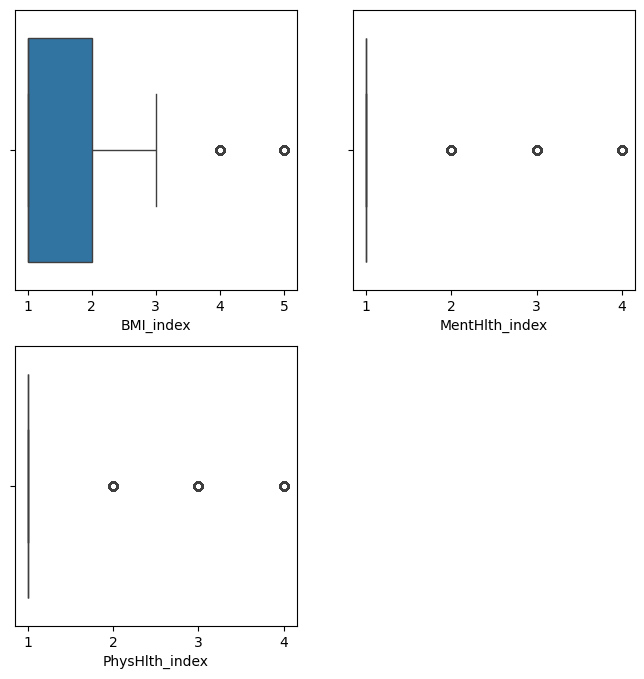

In [20]:
#Para características no binarias
plt.figure(figsize=(8, 8))
plt.title("Boxplot para características no binarias")

variables_indexadas = ['BMI_index', 'MentHlth_index', 'PhysHlth_index']

for i in range(len(variables_indexadas)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_indexado[variables_indexadas[i]])

Es posible apreciar que el número de outliers disminuyó.

## Variables binarias:

In [21]:
for i in caracteristicas_binarias:
    print(f'Cuenta de valores para {i}: ')
    print(df[i].value_counts())

Cuenta de valores para HighBP: 
HighBP
0    144851
1    108829
Name: count, dtype: int64
Cuenta de valores para HighChol: 
HighChol
0    146089
1    107591
Name: count, dtype: int64
Cuenta de valores para CholCheck: 
CholCheck
1    244210
0      9470
Name: count, dtype: int64
Cuenta de valores para Smoker: 
Smoker
0    141257
1    112423
Name: count, dtype: int64
Cuenta de valores para Stroke: 
Stroke
0    243388
1     10292
Name: count, dtype: int64
Cuenta de valores para HeartDiseaseorAttack: 
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
Cuenta de valores para PhysActivity: 
PhysActivity
1    191920
0     61760
Name: count, dtype: int64
Cuenta de valores para Fruits: 
Fruits
1    160898
0     92782
Name: count, dtype: int64
Cuenta de valores para Veggies: 
Veggies
1    205841
0     47839
Name: count, dtype: int64
Cuenta de valores para HvyAlcoholConsump: 
HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64
Cuenta de valores para AnyHealthcare

En este caso no pueden existir outliers ya que solamente hay dos valores.

## Verificación de las variables a elegir para el modelo de aprendizaje automático

In [22]:
for col in df_indexado.columns:
    print(f"{col}: {df_indexado[col].unique()}")

print("Numero total de características: ",len(df_indexado.columns))

HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
Smoker: [1 0]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]
Diabetes_binary: [0 1]
BMI_index: [2, 1, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
MentHlth_index: [3, 1, 4, 2]
Categories (4, int64): [1 < 2 < 3 < 4]
PhysHlth_index: [2, 1, 4, 3]
Categories (4, int64): [1 < 2 < 3 < 4]
Numero total de características:  22


In [23]:
variables_ordinales = ['BMI_index', 'MentHlth_index', 'PhysHlth_index', 'GenHlth', 'Education', 'Income', 'Age']


correlaciones = df_indexado[variables_ordinales + ['Diabetes_binary']].corr()['Diabetes_binary'].drop('Diabetes_binary')
print("Correlación de variables ordinales con Diabetes_binary:")
print(correlaciones)


Correlación de variables ordinales con Diabetes_binary:
BMI_index         0.197169
MentHlth_index    0.070673
PhysHlth_index    0.162912
GenHlth           0.293569
Education        -0.124456
Income           -0.163919
Age               0.177442
Name: Diabetes_binary, dtype: float64


Como se puede observar, no existe una correlación tan significativa entre las variables. Podemos usar un árbol de decisión para poder elegir las variables que nos interesan.  

In [24]:
from sklearn.feature_selection import SelectKBest, chi2


variables_binarias = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                      'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                      'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


X_binario = df_indexado[variables_binarias]
y = df['Diabetes_binary']


chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_binario, y)


chi2_scores = pd.Series(chi2_selector.scores_, index=variables_binarias)
print("Chi-cuadrado para variables categóricas binarias:")
print(chi2_scores.sort_values(ascending=False))


Chi-cuadrado para variables categóricas binarias:
DiffWalk                10059.506391
HighBP                  10029.013935
HeartDiseaseorAttack     7221.975378
HighChol                 5859.710582
Stroke                   2725.225194
PhysActivity              861.887532
HvyAlcoholConsump         779.424807
Smoker                    521.978858
NoDocbcCost               229.542412
Fruits                    154.291404
Veggies                   153.169215
Sex                       140.248274
CholCheck                  39.716825
AnyHealthcare               3.280938
dtype: float64


In [25]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


variables = variables_ordinales + variables_binarias
X = df_indexado[variables]


modelo_arbol = DecisionTreeClassifier(random_state=42)

rfe_selector = RFE(estimator=modelo_arbol, n_features_to_select=10)
rfe_selector.fit(X, y)

rfe_selected_features = pd.Series(rfe_selector.support_, index=variables)
print("Características seleccionadas por RFE:")
print(rfe_selected_features[rfe_selected_features].index.tolist())



Características seleccionadas por RFE:
['MentHlth_index', 'PhysHlth_index', 'GenHlth', 'Education', 'Income', 'Age', 'HighBP', 'PhysActivity', 'Fruits', 'Veggies']


## Entrenamiento del modelo

De acuerdo a los análisis anteriormente descritos muy pocas variables tienen una relación lineal alta, mientras que en el chi cuadrado algunas tienen un valor alto, sin embargo el árbol de decisión nos ayudó a elegir las mejores características para predecir si alguien tiene diabetes o no.

Para poder entrenar el modelo es necesario realizar una técnica de separación de datos (entrenamiento y prueba) utilizando el dataset normalizado. Para este caso se utiliza el algoritmo K-fold-cross-validation debido a que tenemos muchos datos.

Se evalua el modelo junto con el cross validation. Se utiliza el método StratifiedKFold debido a que tenemos una diferencia significativa entre los datos. Por ejemplo, en la variable objetivo tenemos muy pocos valores de 'Si tienen diabetes' contra 'No tienen diabetes'.

### Profundidad de 2

Se pueden utilizar diferentes parámetros. Para este caso, un árbol de dos ramas como máximo y un K = 10 se obtiene lo siguiente:

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np


X = df_indexado[['MentHlth_index', 'PhysHlth_index', 'GenHlth', 'Education', 'Income', 'Age', 'HighBP', 'PhysActivity', 'Fruits', 'Veggies']]
y = df_indexado['Diabetes_binary']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
f1_scores = []
precisions = []
recalls = []


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10, random_state=42)


    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)


    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)


print(f'Precisión promedio: {np.mean(accuracies):.4f}')
print(f'Score F1 promedio: {np.mean(f1_scores):.4f}')
print(f'Precisión promedio: {np.mean(precisions):.4f}')
print(f'Recall promedio: {np.mean(recalls):.4f}')


Precisión promedio: 0.7633
Score F1 promedio: 0.4181
Precisión promedio: 0.3180
Recall promedio: 0.6102


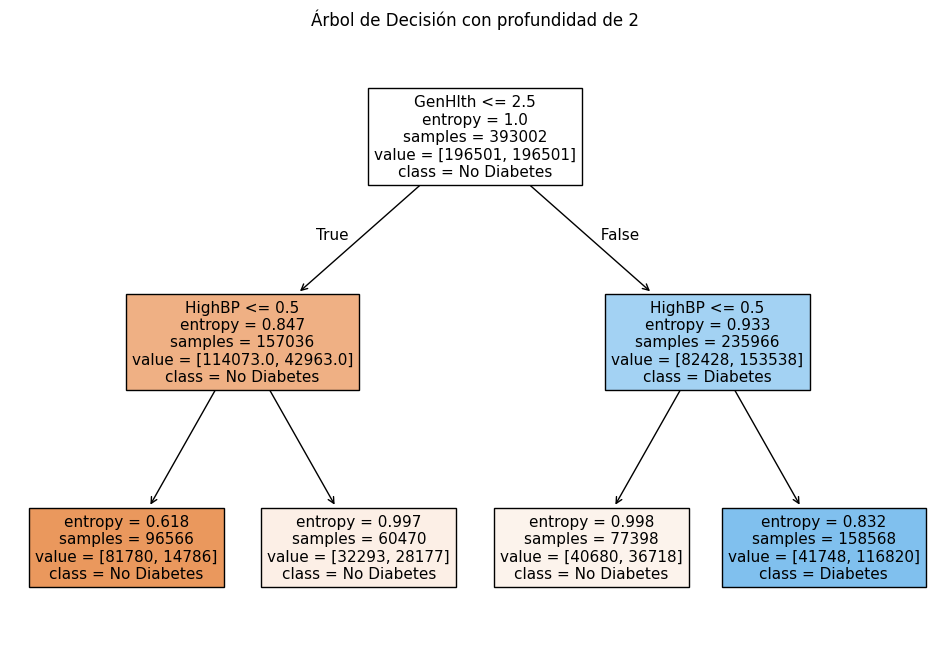

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Árbol de Decisión con profundidad de 2')
plt.show()


### Profundidad de 3

In [28]:
accuracies.clear()
f1_scores.clear()
precisions.clear()
recalls.clear()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10, random_state=42)


    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)


    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)


print(f'Precisión promedio: {np.mean(accuracies):.4f}')
print(f'Score F1 promedio: {np.mean(f1_scores):.4f}')
print(f'Precisión promedio: {np.mean(precisions):.4f}')
print(f'Recall promedio: {np.mean(recalls):.4f}')


Precisión promedio: 0.5801
Score F1 promedio: 0.3687
Precisión promedio: 0.2332
Recall promedio: 0.8799


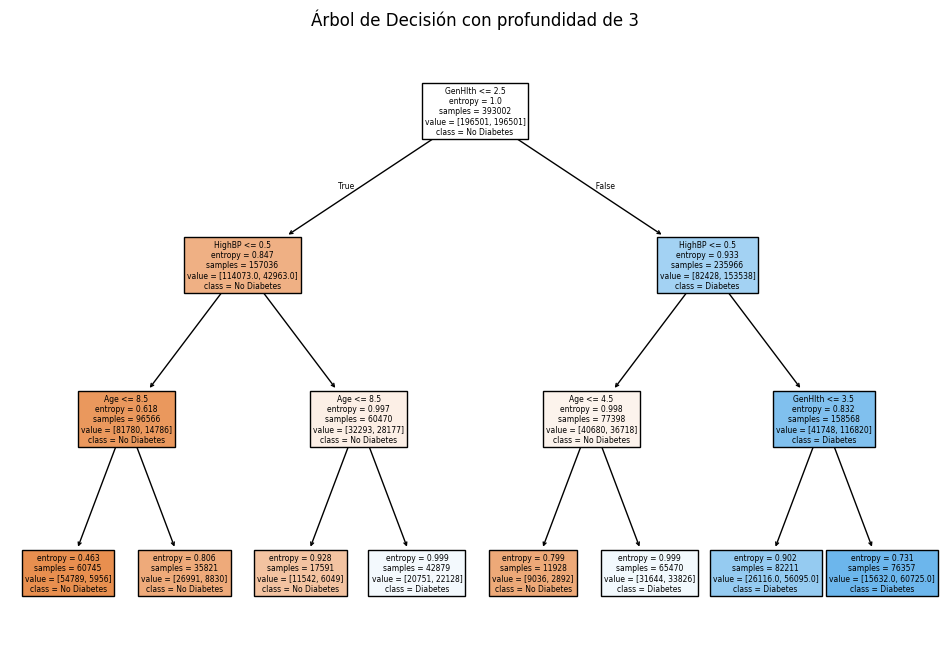

In [29]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Árbol de Decisión con profundidad de 3')
plt.show()

### Profundidad de 4

In [30]:
accuracies.clear()
f1_scores.clear()
precisions.clear()
recalls.clear()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10, random_state=42)


    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)


    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)


print(f'Precisión promedio: {np.mean(accuracies):.4f}')
print(f'Score F1 promedio: {np.mean(f1_scores):.4f}')
print(f'Precisión promedio: {np.mean(precisions):.4f}')
print(f'Recall promedio: {np.mean(recalls):.4f}')


Precisión promedio: 0.6824
Score F1 promedio: 0.4035
Precisión promedio: 0.2733
Recall promedio: 0.7708


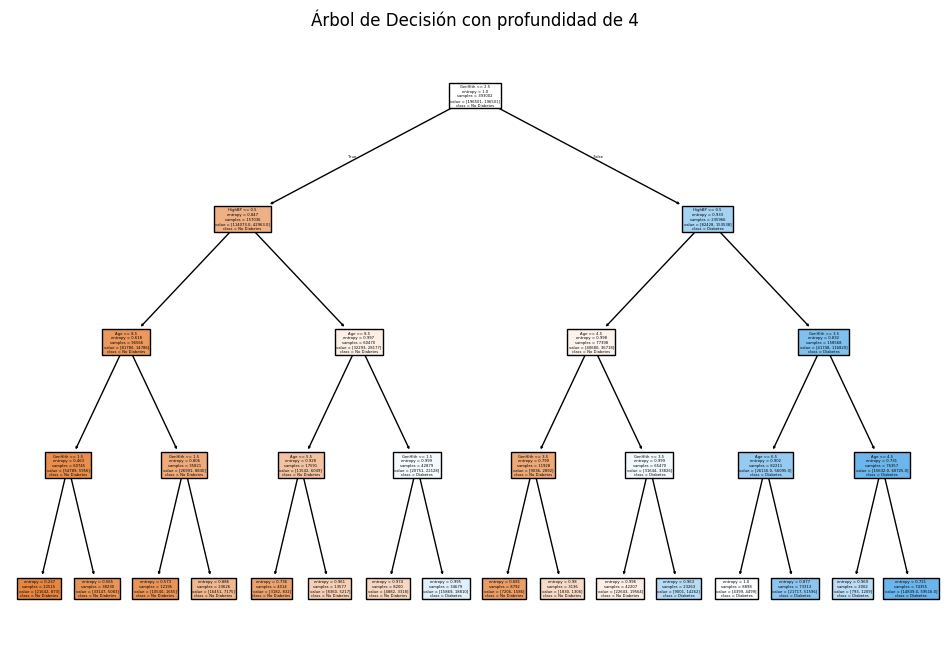

In [31]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Árbol de Decisión con profundidad de 4')
plt.show()

### Profundidad de 5

In [32]:
accuracies.clear()
f1_scores.clear()
precisions.clear()
recalls.clear()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)


    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)


    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)


print(f'Precisión promedio: {np.mean(accuracies):.4f}')
print(f'Score F1 promedio: {np.mean(f1_scores):.4f}')
print(f'Precisión promedio: {np.mean(precisions):.4f}')
print(f'Recall promedio: {np.mean(recalls):.4f}')

Precisión promedio: 0.6409
Score F1 promedio: 0.3933
Precisión promedio: 0.2572
Recall promedio: 0.8353


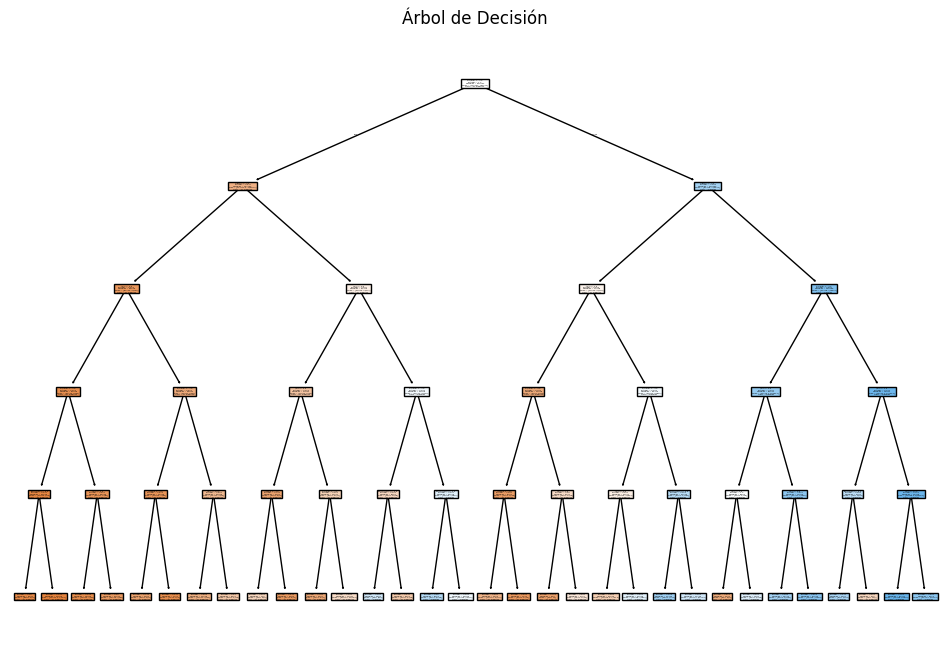

In [33]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Árbol de Decisión')
plt.show()

### Profundidad de 30

In [34]:
accuracies.clear()
f1_scores.clear()
precisions.clear()
recalls.clear()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    model = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=10, random_state=42)


    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)


    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)


print(f'Precisión promedio: {np.mean(accuracies):.4f}')
print(f'Score F1 promedio: {np.mean(f1_scores):.4f}')
print(f'Precisión promedio: {np.mean(precisions):.4f}')
print(f'Recall promedio: {np.mean(recalls):.4f}')

Precisión promedio: 0.7124
Score F1 promedio: 0.3427
Precisión promedio: 0.2514
Recall promedio: 0.5380


Para observar una comparación del desempeño se utiliza otro algoritmo que es el Bosques de decisión, el cual está basado principalmente en un conjunto de árboles de decisión.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print("Precisión promedio: ",accuracy)

Precisión promedio:  0.8601781772311574


Se puede observar que con ese algoritmo el modelo es mucho más eficiente que con un solo árbol de decisión.